In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Part 1:

In [4]:
# Load the logins.json file into a pandas DataFrame
logins_df = pd.read_json(r"C:\Users\restr\Documents\Springboard\Ultimate Technologies\ultimate_challenge\logins.json")

logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


The data consists of a single column, login_time, which represents the timestamp of each user login. 

Next, lets aggregate these login counts based on 15-minute time intervals, and visualize the resulting time series to identify any underlying patterns.

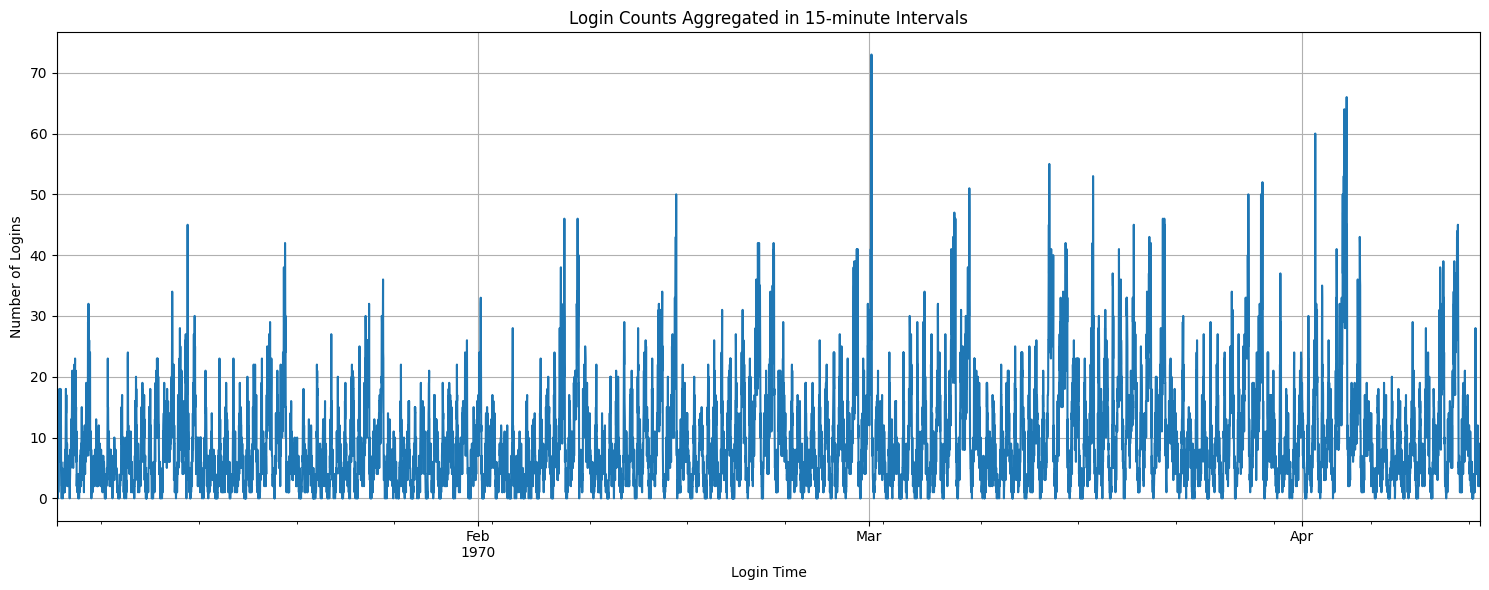

In [5]:
# Set the login_time column as the index
logins_df.set_index('login_time', inplace=True)

# Create a new column to count each login as 1
logins_df['count'] = 1

# Resample the data in 15-minute intervals and sum the counts
resampled_df = logins_df.resample('15T').sum()

# Plot the aggregated login counts
plt.figure(figsize=(15, 6))
resampled_df['count'].plot()
plt.title("Login Counts Aggregated in 15-minute Intervals")
plt.xlabel("Login Time")
plt.ylabel("Number of Logins")
plt.grid(True)
plt.tight_layout()
plt.show()


The above displays login counts aggregated in 15-minute intervals over the time range of the dataset. There seem to be recurring patterns, suggesting daily cycles, but the patterns are a bit difficult to discern at this scale.

To better understand the daily cycles, lets plot the average login counts for each 15-minute interval over a 24-hour period. This will help highlight any daily patterns in user logins.

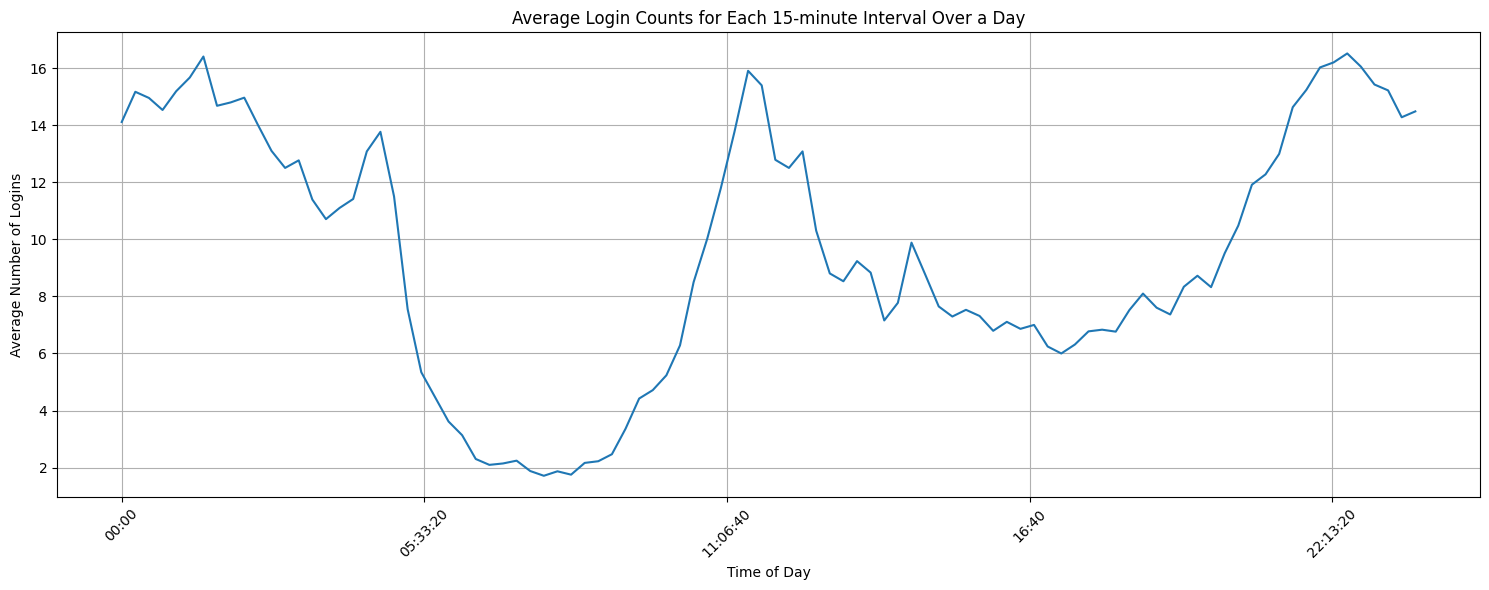

In [6]:
# Extract the hour and minute from the index to group by those values and compute the mean for each 15-minute interval
average_daily_logins = resampled_df.groupby([resampled_df.index.time]).mean()

plt.figure(figsize=(15, 6))
average_daily_logins['count'].plot()
plt.title("Average Login Counts for Each 15-minute Interval Over a Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Number of Logins")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The visualization of the average login counts for each 15-minute interval over a 24-hour period seem to reveal some patterns:

Midnight to Early Morning (12:00 AM - 5:00 AM): A peak is observed in the early hours, with the maximum around 2:30 AM. This could indicate that a significant portion of users are active during the night, which might be due to various reasons like night shifts, international users from different time zones, or specific events happening during these hours.

Morning (5:00 AM - 10:00 AM): There is a sharp decline after the midnight peak, hitting a trough around 7:00 AM. This suggests that user activity is lowest during the early morning hours, likely when most users are asleep or just starting their day.

Mid-Day (10:00 AM - 5:00 PM): The activity starts to pick up again from 10:00 AM, indicating the beginning of typical working hours for users.

Evening to Midnight (5:00 PM - 12:00 AM): Another peak is observed in the evening hours, especially around 10:00 PM. This could be due to users logging in after returning from work or school.

Regarding data quality, the timestamps are from the year 1970, which is commonly used as a placeholder time - so this might not represent the actual year of the logins.


Summarizing, there are evident daily patterns in the login data with peaks during the late night and evening, and troughs during the early morning hours.

# Part 2:

### 1) Key Measure of Success:
The primary objective of the experiment is to encourage driver partners to serve both cities by reimbursing toll costs. Therefore, the key measure of success should be the increase in the number of cross-city trips made by the drivers. 

Specifically, the metric can be the percentage increase in the number of trips that start in one city and end in the other.

This metric is chosen because it directly measures the impact of the initiative. If the toll reimbursement is effective, we should see a clear increase in cross-city trips.
It provides a quantitative measure that can be tracked over time and compared before and after the introduction of the toll reimbursement.

### 2) Practical Experiment Design:

#### a) Implementation:

Phase 1 (Pre-intervention): Observe and record the number of cross-city trips made by driver partners for a specified duration (e.g., one month) without any toll reimbursement.

Phase 2 (Intervention): Announce and implement the toll reimbursement initiative for driver partners. Clearly communicate the benefits and the process of reimbursement.

Phase 3 (Post-intervention): Observe and record the number of cross-city trips made by driver partners for the same duration as Phase 1, but with the toll reimbursement in effect.

#### b) Statistical Tests:

A t-test would be appropriate to compare the means of cross-city trips before and after the intervention. This test is chosen because it compares the means of two related groups (same set of driver partners) under different conditions (with and without toll reimbursement).

The null hypothesis (Ho): there is no significant difference in the number of cross-city trips before and after the toll reimbursement.

The alternative hypothesis (H1): there is a significant difference.

#### c) Interpretation and Recommendations:

If the t-test shows a statistically significant increase in the number of cross-city trips after the toll reimbursement, then the initiative can be deemed successful. The city operations team can consider making the toll reimbursement a permanent feature.

If no significant difference is observed, other factors might be discouraging cross-city trips, so the city operations team should investigate further. It might be related to time taken for the trip, safety concerns, or demand patterns in each city.

#### Caveats:

The observed change might be influenced by external factors not considered in the experiment (e.g., special events in one city, changes in traffic patterns, etc.).
The behavior of driver partners might change over time as they become more accustomed to the toll reimbursement. A longer observation period post-intervention might provide more reliable insights.

It's important to ensure that the reimbursement process is not cumbersome, as a complicated process might deter driver partners from taking advantage of the initiative.

In conclusion, the experiment's success hinges on clear communication with driver partners, a straightforward reimbursement process, and rigorous data collection and analysis to measure its impact.

# Part 3:

In [7]:
# Load the ultimate_data_challenge.json file into a pandas DataFrame
ultimate_df = pd.read_json(r"C:\Users\restr\Documents\Springboard\Ultimate Technologies\ultimate_challenge\ultimate_data_challenge.json")

ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### 1. Data Cleaning, Exploratory Analysis, and Visualization:

Let's start by checking for any missing values, exploring the distribution of key features, and visualizing the data to gain insights into user retention. We'll also determine the fraction of users who were retained.

In [8]:
# Check for missing values in the dataset
missing_values = ultimate_df.isnull().sum()

print(missing_values)


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


We have identified missing values in the following columns:

avg_rating_of_driver: 8,122 missing values
phone: 396 missing values
avg_rating_by_driver: 201 missing values


For avg_rating_of_driver and avg_rating_by_driver, we will fill the missing values with the mean value of their respective columns.

For phone, we can introduce a new category, "Unknown", to represent the missing values.


In [10]:
# Fill missing values
ultimate_df['avg_rating_of_driver'].fillna(ultimate_df['avg_rating_of_driver'].mean(), inplace=True)
ultimate_df['avg_rating_by_driver'].fillna(ultimate_df['avg_rating_by_driver'].mean(), inplace=True)

ultimate_df['phone'].fillna("Unknown", inplace=True)

# Check all missing values
missing_values_updated = ultimate_df.isnull().sum()


print(missing_values_updated)


city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


Next, we'll determine user retention. Lets identify users as "retained" if they took a trip in the last 30 days from the most recent "last_trip_date" in the dataset.

Let's calculate the fraction of users who were retained.

In [11]:
# Convert last_trip_date and signup_date to datetime objects
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

# Identify the most recent trip date in the dataset
most_recent_date = ultimate_df['last_trip_date'].max()

# Determine the "active" users based on the definition provided (took a trip in the last 30 days)
ultimate_df['retained'] = (most_recent_date - ultimate_df['last_trip_date']).dt.days <= 30

# Calculate the fraction of retained users
retention_rate = ultimate_df['retained'].mean()

print(retention_rate)


0.37608


Approximately 37.61% of the observed users were retained, meaning they were active (i.e., took a trip) in the 30 days preceding the most recent "last_trip_date" in the dataset.

Now, let's perform some exploratory analysis and visualization to understand the distribution and characteristics of the retained users compared to non-retained users.

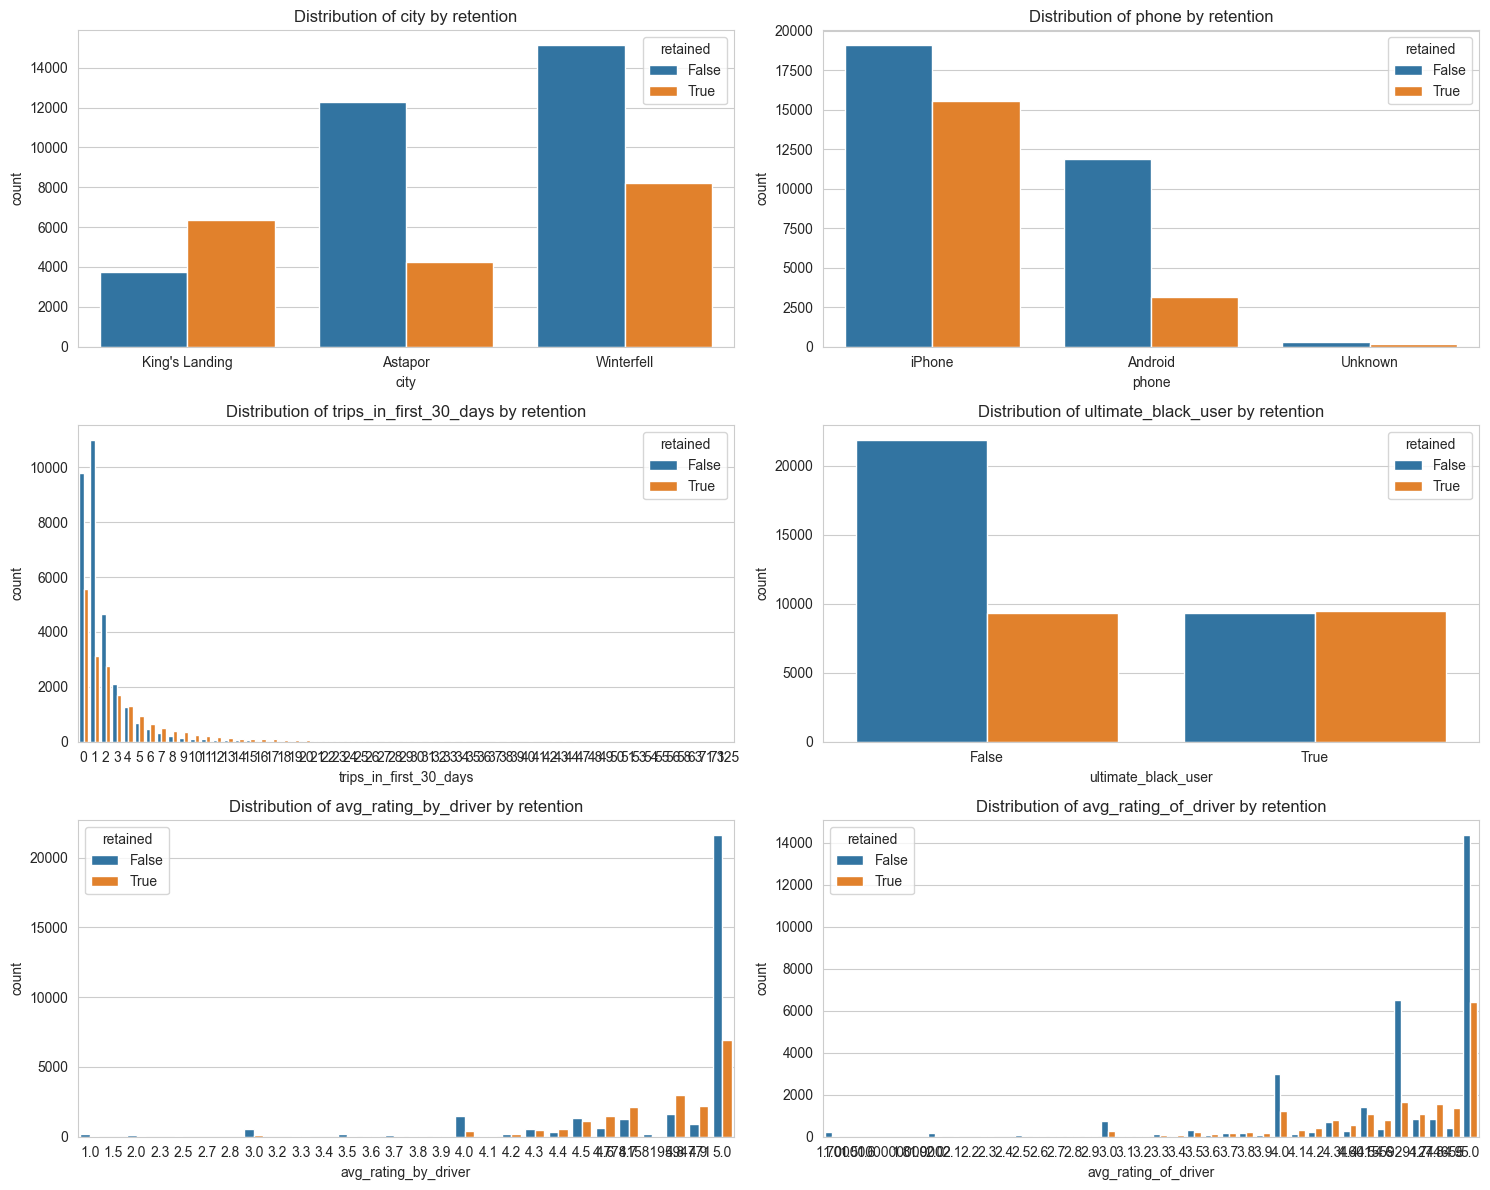

In [13]:
sns.set_style("whitegrid")

# Create a list of features for visualization
features = ['city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user', 'avg_rating_by_driver', 'avg_rating_of_driver']

# Plot the distribution of features for retained vs. non-retained users
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=ultimate_df, x=feature, hue='retained')
    plt.title(f"Distribution of {feature} by retention")
    plt.tight_layout()

plt.show()

From the graphs above, we can make several observations about the retained and non-retained users:

City: Users from "King's Landing" have a higher retention rate compared to other cities. "Astapor" has the lowest retention among the three cities.

Phone: iPhone users have a significantly higher retention rate compared to Android users.

Trips in First 30 Days: Users who took more trips in their first 30 days after signing up seem to have a higher retention rate.

Ultimate Black User: Users who took an "Ultimate Black" trip in their first 30 days have a higher retention rate compared to those who didn't.

Average Rating by Driver: The retention rate is relatively consistent across the different ratings given by drivers, with a slight decrease in retention for users with the lowest ratings.

Average Rating of Driver: Again, the retention rate is relatively consistent across the different ratings given to drivers by users.

With these insights, we can proceed to build a predictive model to determine whether or not a user will be active in their 6th month on the system.


### 2. Building the Predictive Model:

First, we need to define our target variable. A user is considered active in their 6th month if they took a trip between the 5th and 6th month after their signup date. We'll generate this target variable and then build a model to predict it based on the available features.

In [14]:
# A user is active in the 6th month if the difference between the last_trip_date and signup_date is between 5 to 6 months
ultimate_df['active_6th_month'] = ((ultimate_df['last_trip_date'] - ultimate_df['signup_date']).dt.days >= 5*30) & \
                                 ((ultimate_df['last_trip_date'] - ultimate_df['signup_date']).dt.days <= 6*30)

ultimate_df[['signup_date', 'last_trip_date', 'active_6th_month']].head()


,signup_date,last_trip_date,active_6th_month
0,2014-01-25,2014-06-17,False
1,2014-01-29,2014-05-05,False
2,2014-01-06,2014-01-07,False
3,2014-01-10,2014-06-29,True
4,2014-01-27,2014-03-15,False


Now, we will:

1. Prepare the data for modeling by encoding categorical variables and splitting the dataset into training and testing sets.

2. Train a predictive model. For this task, we´ll start with a Random Forest classifier because it can handle both categorical and numerical features, requires minimal preprocessing, and provides feature importance insights.

3. Evaluate the model's performance using appropriate metrics, like accuracy, precision, recall, and the F1 score.

In [16]:
# Drop the columns not used for prediction
X = ultimate_df.drop(columns=['signup_date', 'last_trip_date', 'retained', 'active_6th_month'])
y = ultimate_df['active_6th_month']

# Encode categorical variables
label_encoders = {}  # Store label encoders for potential future use
for col in ['city', 'phone']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
X_train.shape, X_test.shape

((40000, 10), (10000, 10))

The data has been successfully split into training and testing sets. We have 40,000 samples in the training set and 10,000 samples in the testing set.

Now, let's train a Random Forest classifier and evaluate its performance:

In [18]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict the target for the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report

(0.7743,
 '              precision    recall  f1-score   support\n\n       False       0.83      0.88      0.85      7437\n        True       0.57      0.46      0.51      2563\n\n    accuracy                           0.77     10000\n   macro avg       0.70      0.67      0.68     10000\nweighted avg       0.76      0.77      0.77     10000\n')

The model achieved an accuracy of approximately 77.43% on the test data.

Precision, recall, and F1-score were also computed. 
For predicting users active in their 6th month:

Precision: 0.57

Recall: 0.46

F1-score: 0.51

Recommendations and Insights:

- Ultimate can focus on promoting the service more in "King's Landing" and work on strategies to improve retention in other cities.

- There seems to be a preference or better experience for iPhone users. Investigating the app's performance or user experience on Android devices might reveal areas for improvement.

- Encouraging new users to take more rides in their first month, possibly through promotions or discounts